# Tutorial for Python Users

In this introductory tutorial, we go through the different steps of a CausalBGM workflow.

Users can use CausalBGM by **Python API** or a **single command line** after installation.

First of all, you need to install CausalBGM, please refer to the [install page](https://causalbgm.readthedocs.io/en/latest/installation.html).



<div class="alert alert-info">
<b>Notes</b>

- We develop a Python Pypi package *[bayesgm](https://pypi.org/project/bayesgm/)* for AI-powered Bayesian generative modeling approaches. *CausalBGM* is one of the models in this package.

- More Bayesian generative modeling approaches will be included in the future. Stay tuned!

</div>

In [1]:
import numpy as np
import pandas as pd
import yaml
import bayesgm
print("Currently use version %s of bayesgm."%bayesgm.__version__)

2025-01-20 11:07:12.151772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-20 11:07:12.282899: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 11:07:13.052515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /share/software/user/open/cudnn/8.1.1.33/lib64:/share/software/user/open/nccl/2.8.4/lib:/usr/lib64/nvidia:/share/software/user/open/cuda/11.2.0/targets/x86_64-linux/lib:/share/software/user/open/cuda/11.2.0/lib64

Currently use version 0.2.0 of bayesgm.


## Use CausalBGM Python API in continous treatment setting

We will use `Hirano and Imbens dataset` for an example.

### CausalBGM Configuration Parameters

Before creating a CausalBGM model, a python `dict` object should be created for configing a CausalBGM model, which are described as follows.

#### General Parameters
| Config Parameter        | Description |
|-------------------------|-------------|
| `dataset`               | Dataset name to indicate the input data. *Default: 'Sim_Hirano_Imbens'.* |
| `output_dir`            | Output directory to save the results during the model training. *Default: '.'.* |
| `save_res`              | Whether to save intermediate results. *Default: True.* |
| `save_model`            | Whether to save the model after training. *Default: False.* |
| `binary_treatment`      | Whether to use binary treatment settings. *Default: False.* |
| `use_bnn`               | Whether to use Bayesian neural networks. *Default: True.* |

#### Parameters for Iterative Updating Algorithm
| Config Parameter        | Description |
|-------------------------|-------------|
| `z_dims`                | Latent dimensions of `Z`. *Default: [1, 1, 1, 7].* |
| `v_dim`                 | Dimension of covariates. *Default: 200.* |
| `lr_theta`              | Learning rate for updating model parameters. *Default: 0.0001.* |
| `lr_z`                  | Learning rate for updating latent variables. *Default: 0.0001.* |
| `x_min`                 | Lower bound for the treatment interval. *Default: 0.* |
| `x_max`                 | Upper bound for the treatment interval. *Default: 3.* |
| `g_units`               | Number of units for covariates generative model. *Default: [64, 64, 64, 64, 64].* |
| `f_units`               | Number of units for outcome generative model. *Default: [64, 32, 8].* |
| `h_units`               | Number of units for treatment generative model. *Default: [64, 32, 8].* |

#### Parameters for EGM Initialization
| Config Parameter        | Description |
|-------------------------|-------------|
| `kl_weight`             | Coefficient for KL divergence term in BNNs. *Default: 0.0001.* |
| `lr`                    | Learning rate for EGM initialization. *Default: 0.0002.* |
| `g_d_freq`              | Frequency for updating discriminators and generators. *Default: 5.* |
| `use_z_rec`             | Whether to use reconstruction for latent features. *Default: True.* |
| `e_units`               | Number of units for the encoder network. *Default: [64, 64, 64, 64, 64].* |
| `dz_units`              | Number of units for the discriminator network in latent space. *Default: [64, 32, 8].* |

<div class="alert alert-info">
<b>Notes</b>

- Parameters with *BooleanOptionalAction* can be set as true or false by simply using their flag or prefixing with *--no-* (e.g., *--binary_treatment* or *--no-binary_treatment*).

- Configure parameters carefully to suit your dataset and research objectives.

- Many example config files are provided in *CausalBGM/src/configs* ([link](https://github.com/SUwonglab/CausalBGM/tree/main/src/configs)) for datasets used in the paper.

</div>

### Loading config parameters 

In [2]:
params = yaml.safe_load(open('../../src/configs/Sim_Hirano_Imbens.yaml', 'r'))
print(params)

{'dataset': 'Sim_Hirano_Imbens', 'output_dir': '.', 'save_res': True, 'save_model': False, 'binary_treatment': False, 'use_bnn': True, 'z_dims': [1, 1, 1, 7], 'v_dim': 200, 'lr_theta': 0.0001, 'lr_z': 0.0001, 'x_min': 0, 'x_max': 3, 'g_units': [64, 64, 64, 64, 64], 'f_units': [64, 32, 8], 'h_units': [64, 32, 8], 'kl_weight': 0.0001, 'lr': 0.0002, 'g_d_freq': 5, 'use_z_rec': True, 'e_units': [64, 64, 64, 64, 64], 'dz_units': [64, 32, 8]}


### Instantiate a CausalBGM model

In [3]:
model = bayesgm.models.CausalBGM(params=params, random_seed=None)

2025-01-19 23:20:43.541882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-19 23:20:44.034248: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43430 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:06:00.0, compute capability: 8.6
/home/users/liuqiao/.local/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/home/users/liuqiao/.local/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable`

### Data preparation  

The input data are organized in a triplet, which contains treatment (*X*), potential outcome (*Y*), and covariates (*V*).

In [4]:
from bayesgm.datasets import Sim_Hirano_Imbens_sampler
x,y,v = Sim_Hirano_Imbens_sampler(N=20000, v_dim=200).load_all()
print(x.shape,y.shape,v.shape)

(20000, 1) (20000, 1) (20000, 200)


### EGM initialization

Perform Encoding Generative Modeling (EGM) initialization. Note that this step can be skipped but the performance can be generally improved through EGM initialization.

| Config Parameter        | Description |
|-------------------------|-------------|
| `data`                  | Tuple of data inputs `(x, y, v)`, *Required.* |
| `n_iter`                | Number of iterations for the initialization process. *Default: 30,000.* |
| `batches_per_eval`      | Frequency of evaluations (e.g., every 500 batches). *Default: 500.* |
| `verbose`               | Controls verbosity level, showing progress and evaluation metrics. *Default: 1.* |



In [5]:
model.egm_init(data=(x,y,v), n_iter=30000, batches_per_eval=500, verbose=1)

EGM Initialization Starts ...


/home/users/liuqiao/.local/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/home/users/liuqiao/.local/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


EGM Initialization Iter [0] : e_loss_adv [0.0665], l2_loss_v [1.0201], l2_loss_z [1.0091], l2_loss_x [0.9462], l2_loss_y [4.3530], g_e_loss [7.3950], dz_loss [-0.0951], d_loss [1.7874]
EGM Initialization Iter [500] : e_loss_adv [2.2277], l2_loss_v [1.0101], l2_loss_z [0.8980], l2_loss_x [11.0854], l2_loss_y [11.9196], g_e_loss [27.1409], dz_loss [-1.7254], d_loss [-1.5875]
EGM Initialization Iter [1000] : e_loss_adv [0.9045], l2_loss_v [1.0141], l2_loss_z [0.8220], l2_loss_x [0.3612], l2_loss_y [1.8464], g_e_loss [4.9483], dz_loss [-1.2250], d_loss [-1.1138]
EGM Initialization Iter [1500] : e_loss_adv [0.8104], l2_loss_v [1.0193], l2_loss_z [0.7354], l2_loss_x [1.6160], l2_loss_y [1.5049], g_e_loss [5.6860], dz_loss [-1.5718], d_loss [-1.3966]
EGM Initialization Iter [2000] : e_loss_adv [0.1312], l2_loss_v [0.9763], l2_loss_z [0.6812], l2_loss_x [3.7975], l2_loss_y [1.5453], g_e_loss [7.1316], dz_loss [-0.7174], d_loss [-0.6332]
EGM Initialization Iter [2500] : e_loss_adv [0.0660], l2_

EGM Initialization Iter [22000] : e_loss_adv [-2.6150], l2_loss_v [0.9903], l2_loss_z [0.2248], l2_loss_x [0.8365], l2_loss_y [1.2873], g_e_loss [0.7238], dz_loss [0.1986], d_loss [0.2811]
EGM Initialization Iter [22500] : e_loss_adv [-2.4646], l2_loss_v [0.9223], l2_loss_z [0.2612], l2_loss_x [1.4485], l2_loss_y [0.9124], g_e_loss [1.0799], dz_loss [-0.5709], d_loss [-0.4917]
EGM Initialization Iter [23000] : e_loss_adv [-1.5274], l2_loss_v [0.9558], l2_loss_z [0.2414], l2_loss_x [0.5077], l2_loss_y [0.9048], g_e_loss [1.0824], dz_loss [-0.4832], d_loss [-0.4351]
EGM Initialization Iter [23500] : e_loss_adv [-2.8291], l2_loss_v [0.9323], l2_loss_z [0.2230], l2_loss_x [0.3300], l2_loss_y [0.8511], g_e_loss [-0.4928], dz_loss [-0.0390], d_loss [-0.0077]
EGM Initialization Iter [24000] : e_loss_adv [-2.7735], l2_loss_v [0.9290], l2_loss_z [0.2478], l2_loss_x [2.4516], l2_loss_y [1.2566], g_e_loss [2.1115], dz_loss [-0.1437], d_loss [-0.0888]
EGM Initialization Iter [24500] : e_loss_adv [

### Train the model with an iterative updating algorithm

| Config Parameter        | Description |
|-------------------------|-------------|
| `batch_size`            | Batch size for training. *Default: 32.* |
| `epochs`                | Number of epochs for training. *Default: 100.* |
| `epochs_per_eval`       | Frequency of evaluations during training (e.g., every 5 epochs). *Default: 5.* |
| `startoff`              | Starting epoch for evaluation. *Default: 0.* |
| `verbose`               | Controls verbosity level, showing training progress and metrics. *Default: 1.* |
| `save_format`           | Format for saving results. *Default: 'txt'.* |


In [6]:
model.fit(data=(x,y,v), epochs=100, epochs_per_eval=10, verbose=1)

Initialize latent variables Z with e(V)...
Iterative Updating Starts ...


Epoch 0/100: 100%|██████████| 625/625 [00:26<00:00, 23.29batch/s, loss_px_z: [0.9353], loss_mse_x: [0.7314], loss_py_z: [1.6521], loss_mse_y: [1.7054], loss_pv_z: [103.2145], loss_mse_v: [0.9457], loss_postrior_z: [100.7249]]   


Epoch [0/100]: MSE_x: 2.2188, MSE_y: 1.2527, MSE_v: 0.9735



Epoch 10/100: 100%|██████████| 625/625 [00:16<00:00, 36.85batch/s, loss_px_z: [0.6630], loss_mse_x: [0.8792], loss_py_z: [1.2816], loss_mse_y: [1.4835], loss_pv_z: [99.6124], loss_mse_v: [0.9183], loss_postrior_z: [96.2378]]   


Epoch [10/100]: MSE_x: 2.5815, MSE_y: 1.2891, MSE_v: 0.9687



Epoch 20/100: 100%|██████████| 625/625 [00:17<00:00, 36.50batch/s, loss_px_z: [0.9555], loss_mse_x: [6.1386], loss_py_z: [1.4216], loss_mse_y: [2.0692], loss_pv_z: [103.8186], loss_mse_v: [0.9595], loss_postrior_z: [103.1262]] 


Epoch [20/100]: MSE_x: 2.7672, MSE_y: 1.2611, MSE_v: 0.9679



Epoch 30/100: 100%|██████████| 625/625 [00:16<00:00, 37.08batch/s, loss_px_z: [0.7155], loss_mse_x: [1.6392], loss_py_z: [1.0509], loss_mse_y: [1.2649], loss_pv_z: [109.0560], loss_mse_v: [1.0120], loss_postrior_z: [107.4968]] 


Epoch [30/100]: MSE_x: 2.4866, MSE_y: 1.2518, MSE_v: 0.9672



Epoch 40/100: 100%|██████████| 625/625 [00:17<00:00, 36.37batch/s, loss_px_z: [0.7066], loss_mse_x: [0.8722], loss_py_z: [0.9005], loss_mse_y: [1.1601], loss_pv_z: [105.7172], loss_mse_v: [0.9855], loss_postrior_z: [104.7077]]  


Epoch [40/100]: MSE_x: 2.4951, MSE_y: 1.2778, MSE_v: 0.9668



Epoch 50/100: 100%|██████████| 625/625 [00:16<00:00, 36.78batch/s, loss_px_z: [0.7411], loss_mse_x: [1.4187], loss_py_z: [0.9936], loss_mse_y: [1.2935], loss_pv_z: [111.8437], loss_mse_v: [1.0431], loss_postrior_z: [110.7148]]  


Epoch [50/100]: MSE_x: 2.4098, MSE_y: 1.2308, MSE_v: 0.9669



Epoch 60/100: 100%|██████████| 625/625 [00:17<00:00, 36.70batch/s, loss_px_z: [0.5066], loss_mse_x: [0.6818], loss_py_z: [0.7969], loss_mse_y: [0.9428], loss_pv_z: [104.1335], loss_mse_v: [0.9722], loss_postrior_z: [101.7947]]  


Epoch [60/100]: MSE_x: 2.4814, MSE_y: 1.2385, MSE_v: 0.9666



Epoch 70/100: 100%|██████████| 625/625 [00:17<00:00, 36.43batch/s, loss_px_z: [0.6861], loss_mse_x: [0.9651], loss_py_z: [0.9000], loss_mse_y: [1.2940], loss_pv_z: [104.4632], loss_mse_v: [0.9750], loss_postrior_z: [102.8140]] 


Epoch [70/100]: MSE_x: 2.3544, MSE_y: 1.2310, MSE_v: 0.9665



Epoch 80/100: 100%|██████████| 625/625 [00:17<00:00, 36.40batch/s, loss_px_z: [0.4906], loss_mse_x: [0.9311], loss_py_z: [1.0194], loss_mse_y: [1.3942], loss_pv_z: [97.7877], loss_mse_v: [0.9111], loss_postrior_z: [96.3446]]    


Epoch [80/100]: MSE_x: 2.3948, MSE_y: 1.2321, MSE_v: 0.9663



Epoch 90/100: 100%|██████████| 625/625 [00:17<00:00, 36.59batch/s, loss_px_z: [0.4603], loss_mse_x: [10.2162], loss_py_z: [0.9069], loss_mse_y: [1.2040], loss_pv_z: [103.6781], loss_mse_v: [0.9698], loss_postrior_z: [103.6631]]


Epoch [90/100]: MSE_x: 2.4799, MSE_y: 1.2599, MSE_v: 0.9661



Epoch 100/100: 100%|██████████| 625/625 [00:17<00:00, 36.58batch/s, loss_px_z: [0.2578], loss_mse_x: [0.6818], loss_py_z: [0.8397], loss_mse_y: [1.1665], loss_pv_z: [106.6790], loss_mse_v: [1.0017], loss_postrior_z: [105.3335]] 


Epoch [100/100]: MSE_x: 2.4033, MSE_y: 1.2315, MSE_v: 0.9661



### Make predictions using the trained CausalBGM model

| Config Parameter        | Description |
|-------------------------|-------------|
| `data`                 | Tuple of data inputs `(x, y, v)`, *Required.* |
| `alpha`                | Significance level for the posterior interval. *Default: 0.01.* |
| `n_mcmc`               | Number of posterior MCMC samples to draw. *Default: 3000.* |
| `x_values`             | Treatment values for dose-response function to be predicted. *Examples: 1.0 or [1.0,2.0]* |
| `q_sd`                 | Standard deviation for the proposal distribution used in Metropolis-Hastings (MH) sampling. *Default: 1.0.* |
| `sample_y`             | Whether to consider the variance function in the outcome generative model. *Default: True.* |
| `bs`                   | Batch size for processing posterior samples to improve efficiency. *Default: 100.* |


| Return     | Type          | Description                                                                                             | Shape       |
|------------|---------------|---------------------------------------------------------------------------------------------------------|-------------|
| `pre_adrf_mean`     | `np.ndarray`  | Point estimates of the Average Dose-Response Function.                                                  | `(len(x_values),)` |
| `pre_adrf_PI`  | `np.ndarray`  | Posterior intervals for the ADRF, representing `[lower bound, upper bound]` | `(len(x_values), 2)` 

In [7]:
pre_adrf_mean, pre_adrf_PI = model.predict(data=(x,y,v), alpha=0.01, n_mcmc=3000, x_values=np.linspace(0,3,20), q_sd=1.0)

MCMC Latent Variable Sampling ...
Final MCMC Acceptance Rate: 0.1035


<div class="alert alert-warning">
<b>Model Diagnosis</b>

- An ideal MCMC acceptance rate should be between 10% to 30%.
    
- The random seed will affect the MCMC process with Bayesian neural networks. We recommand to set it to *None*.

</div>

### Visualizating and evaluating the results

Show the true average dose-response function (ADRF) and the predicted ADRF.

RMSE (Root Mean Squared Error): 0.0263
MAPE (Mean Absolute Percentage Error): 0.0108


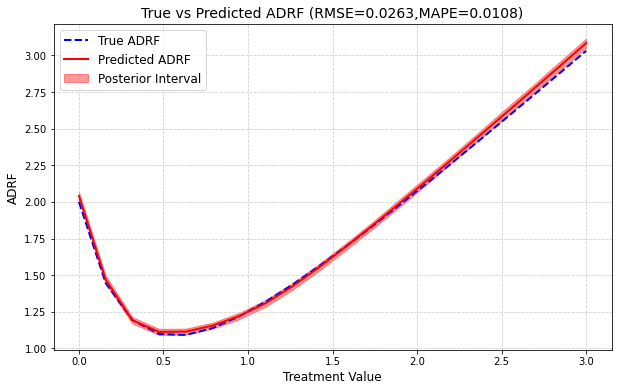

In [8]:
import matplotlib.pyplot as plt
from bayesgm.utils import get_ADRF

x_values = np.linspace(0,3,20)  # treatment values
true_adrf = get_ADRF(x_values = x_values,  dataset='Imbens') # true ADRF for Hirano and Imbens dataset
#true_adrf = x_values + 2/(1+x_values)**3 # true ADRF for Hirano and Imbens dataset

# Evaluate
rmse = np.sqrt(np.mean((true_adrf-pre_adrf_mean)**2))
mape = np.mean([abs((item[0]-item[1])/item[0]) for item in zip(true_adrf, pre_adrf_mean)])

print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.4f}")

# Create the plot
plt.figure(figsize=(10, 6))
# Plot the ground truth curve
plt.plot(x_values, true_adrf, label='True ADRF', color='blue', linestyle='--', linewidth=2)
# Plot the predicted mean curve
plt.plot(x_values, pre_adrf_mean, label='Predicted ADRF', color='red', linewidth=2)
# Plot the posterior intervals
plt.fill_between(x_values, pre_adrf_PI[:, 0], pre_adrf_PI[:, 1], color='red', alpha=0.4, label='Posterior Interval')

# Add labels, legend, and title
plt.xlabel('Treatment Value', fontsize=12)
plt.ylabel('ADRF', fontsize=12)
plt.title('True vs Predicted ADRF (RMSE=%.4f,MAPE=%.4f)'%(rmse, mape), fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

## Use CausalBGM Python API in binary treatment setting

We will use `ACIC 2018` dataset for an example.

In [2]:
params = yaml.safe_load(open('../../src/configs/Semi_acic.yaml', 'r'))
print(params)

{'dataset': 'Semi_acic', 'output_dir': '.', 'save_res': True, 'save_model': True, 'binary_treatment': True, 'use_bnn': True, 'z_dims': [3, 6, 3, 6], 'v_dim': 177, 'lr_theta': 0.0001, 'lr_z': 0.0001, 'g_units': [64, 64, 64, 64, 64], 'f_units': [64, 32, 8], 'h_units': [64, 32, 8], 'kl_weight': 0.0001, 'lr': 0.0002, 'g_d_freq': 5, 'use_z_rec': True, 'e_units': [64, 64, 64, 64, 64], 'dz_units': [64, 32, 8]}


### Instantiate a CausalBGM model

In [3]:
model = bayesgm.models.CausalBGM(params=params,random_seed=None)

2025-01-20 11:07:28.516352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-20 11:07:29.006555: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43430 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:06:00.0, compute capability: 8.6
/home/users/liuqiao/.local/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/home/users/liuqiao/.local/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable`

### Data preparation  

The input data are organized in a triplet, which contains treatment (*X*), potential outcome (*Y*), and covariates (*V*).

In [4]:
#get the data from the ACIC 2018 competition dataset with a specified ufid.
x,y,v = bayesgm.datasets.Semi_acic_sampler(path='../../data/ACIC_2018',ufid='629e3d2c63914e45b227cc913c09cebe').load_all()
print(x.shape,y.shape,v.shape)

(1000, 1) (1000, 1) (1000, 177)


### EGM initialization

Perform Encoding Generative Modeling (EGM) initialization. Note that this step can be skipped but the performance can be generally improved through EGM initialization.

| Config Parameter        | Description |
|-------------------------|-------------|
| `data`                  | Tuple of data inputs `(x, y, v)`, *Required.* |
| `n_iter`                | Number of iterations for the initialization process. *Default: 30,000.* |
| `batches_per_eval`      | Frequency of evaluations (e.g., every 500 batches). *Default: 500.* |
| `verbose`               | Controls verbosity level, showing progress and evaluation metrics. *Default: 1.* |



In [5]:
model.egm_init(data=(x,y,v), n_iter=30000, batches_per_eval=500, verbose=1)

EGM Initialization Starts ...


/home/users/liuqiao/.local/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/home/users/liuqiao/.local/lib/python3.9/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


EGM Initialization Iter [0] : e_loss_adv [-0.0048], l2_loss_v [0.8659], l2_loss_z [1.0285], l2_loss_x [0.6900], l2_loss_y [0.2743], g_e_loss [2.8539], dz_loss [-0.2339], d_loss [1.9889]
EGM Initialization Iter [500] : e_loss_adv [1.8128], l2_loss_v [1.2097], l2_loss_z [0.9711], l2_loss_x [0.6965], l2_loss_y [0.1035], g_e_loss [4.7936], dz_loss [-1.9445], d_loss [-1.4249]
EGM Initialization Iter [1000] : e_loss_adv [-0.1602], l2_loss_v [1.6649], l2_loss_z [1.0866], l2_loss_x [0.6806], l2_loss_y [0.0947], g_e_loss [3.3665], dz_loss [-1.4054], d_loss [-1.2449]
EGM Initialization Iter [1500] : e_loss_adv [-2.1816], l2_loss_v [0.4057], l2_loss_z [1.0311], l2_loss_x [0.6986], l2_loss_y [0.0549], g_e_loss [0.0088], dz_loss [-1.1276], d_loss [-0.9217]
EGM Initialization Iter [2000] : e_loss_adv [-2.5009], l2_loss_v [0.6266], l2_loss_z [0.8493], l2_loss_x [0.6876], l2_loss_y [0.1104], g_e_loss [-0.2269], dz_loss [-0.9880], d_loss [-0.8353]
EGM Initialization Iter [2500] : e_loss_adv [-2.3228], 

EGM Initialization Iter [22000] : e_loss_adv [0.7837], l2_loss_v [0.4243], l2_loss_z [0.7841], l2_loss_x [0.5790], l2_loss_y [0.0710], g_e_loss [2.6422], dz_loss [0.1568], d_loss [0.2571]
EGM Initialization Iter [22500] : e_loss_adv [-1.2761], l2_loss_v [0.9710], l2_loss_z [0.8539], l2_loss_x [0.5253], l2_loss_y [0.0834], g_e_loss [1.1573], dz_loss [-0.3549], d_loss [-0.2831]
EGM Initialization Iter [23000] : e_loss_adv [0.0581], l2_loss_v [1.0084], l2_loss_z [0.7387], l2_loss_x [0.5958], l2_loss_y [0.0616], g_e_loss [2.4626], dz_loss [0.0072], d_loss [0.1315]
EGM Initialization Iter [23500] : e_loss_adv [0.2070], l2_loss_v [0.3864], l2_loss_z [0.6959], l2_loss_x [0.6486], l2_loss_y [0.0864], g_e_loss [2.0243], dz_loss [-0.0217], d_loss [0.0959]
EGM Initialization Iter [24000] : e_loss_adv [-0.6877], l2_loss_v [0.5298], l2_loss_z [0.7314], l2_loss_x [0.5116], l2_loss_y [0.1222], g_e_loss [1.2073], dz_loss [-0.7778], d_loss [-0.7147]
EGM Initialization Iter [24500] : e_loss_adv [0.6503]

### Train the model with an iterative updating algorithm

| Config Parameter        | Description |
|-------------------------|-------------|
| `batch_size`            | Batch size for training. *Default: 32.* |
| `epochs`                | Number of epochs for training. *Default: 100.* |
| `epochs_per_eval`       | Frequency of evaluations during training (e.g., every 5 epochs). *Default: 5.* |
| `startoff`              | Starting epoch for evaluation. *Default: 0.* |
| `verbose`               | Controls verbosity level, showing training progress and metrics. *Default: 1.* |
| `save_format`           | Format for saving results. *Default: 'txt'.* |


In [6]:
model.fit(data=(x,y,v), epochs=100, epochs_per_eval=10, verbose=1)

Initialize latent variables Z with e(V)...
Iterative Updating Starts ...


Epoch 0/100: 100%|██████████| 31/31 [00:10<00:00,  2.95batch/s, loss_px_z: [0.9565], loss_mse_x: [0.2663], loss_py_z: [0.6540], loss_mse_y: [0.1128], loss_pv_z: [47.4268], loss_mse_v: [0.5593], loss_postrior_z: [71.9446]]


Epoch [0/100]: MSE_x: 0.1086, MSE_y: 0.0808, MSE_v: 0.4963

Saving checkpoint for epoch 0 at ./checkpoints/Semi_acic/20250120_110730/ckpt-0


Epoch 10/100: 100%|██████████| 31/31 [00:00<00:00, 38.33batch/s, loss_px_z: [1.0827], loss_mse_x: [0.3986], loss_py_z: [0.5873], loss_mse_y: [0.0606], loss_pv_z: [19.5254], loss_mse_v: [0.3610], loss_postrior_z: [20.2223]]


Epoch [10/100]: MSE_x: 0.1067, MSE_y: 0.0803, MSE_v: 0.4858

Saving checkpoint for epoch 10 at ./checkpoints/Semi_acic/20250120_110730/ckpt-10


Epoch 20/100: 100%|██████████| 31/31 [00:00<00:00, 38.22batch/s, loss_px_z: [1.0596], loss_mse_x: [0.3816], loss_py_z: [0.5646], loss_mse_y: [0.0908], loss_pv_z: [6.5389], loss_mse_v: [0.2932], loss_postrior_z: [6.5450]]  


Epoch [20/100]: MSE_x: 0.1049, MSE_y: 0.0819, MSE_v: 0.4817



Epoch 30/100: 100%|██████████| 31/31 [00:00<00:00, 39.10batch/s, loss_px_z: [0.9159], loss_mse_x: [0.2438], loss_py_z: [0.4214], loss_mse_y: [0.0742], loss_pv_z: [27.0957], loss_mse_v: [0.5506], loss_postrior_z: [30.3566]]


Epoch [30/100]: MSE_x: 0.1059, MSE_y: 0.0901, MSE_v: 0.4801



Epoch 40/100: 100%|██████████| 31/31 [00:00<00:00, 38.62batch/s, loss_px_z: [1.0522], loss_mse_x: [0.3860], loss_py_z: [0.3248], loss_mse_y: [0.1322], loss_pv_z: [25.5094], loss_mse_v: [0.5384], loss_postrior_z: [32.9880]]


Epoch [40/100]: MSE_x: 0.1058, MSE_y: 0.0946, MSE_v: 0.4788



Epoch 50/100: 100%|██████████| 31/31 [00:00<00:00, 38.59batch/s, loss_px_z: [0.9679], loss_mse_x: [0.3076], loss_py_z: [0.1408], loss_mse_y: [0.1025], loss_pv_z: [-8.7631], loss_mse_v: [0.2855], loss_postrior_z: [-8.4878]] 


Epoch [50/100]: MSE_x: 0.1048, MSE_y: 0.0917, MSE_v: 0.4704



Epoch 60/100: 100%|██████████| 31/31 [00:00<00:00, 40.28batch/s, loss_px_z: [1.0632], loss_mse_x: [0.4086], loss_py_z: [0.0418], loss_mse_y: [0.0969], loss_pv_z: [15.1453], loss_mse_v: [0.4034], loss_postrior_z: [17.7017]] 


Epoch [60/100]: MSE_x: 0.1047, MSE_y: 0.1128, MSE_v: 0.4751



Epoch 70/100: 100%|██████████| 31/31 [00:00<00:00, 39.71batch/s, loss_px_z: [0.9547], loss_mse_x: [0.3057], loss_py_z: [0.1292], loss_mse_y: [0.1079], loss_pv_z: [21.4773], loss_mse_v: [0.4979], loss_postrior_z: [21.9116]] 


Epoch [70/100]: MSE_x: 0.1043, MSE_y: 0.0945, MSE_v: 0.4704



Epoch 80/100: 100%|██████████| 31/31 [00:00<00:00, 40.28batch/s, loss_px_z: [1.0548], loss_mse_x: [0.4115], loss_py_z: [-0.0176], loss_mse_y: [0.0793], loss_pv_z: [18.6088], loss_mse_v: [0.7449], loss_postrior_z: [18.3221]] 


Epoch [80/100]: MSE_x: 0.1056, MSE_y: 0.0979, MSE_v: 0.4621



Epoch 90/100: 100%|██████████| 31/31 [00:00<00:00, 37.92batch/s, loss_px_z: [0.9579], loss_mse_x: [0.3202], loss_py_z: [-0.0218], loss_mse_y: [0.0877], loss_pv_z: [8.1148], loss_mse_v: [0.4944], loss_postrior_z: [7.5853]]    


Epoch [90/100]: MSE_x: 0.1048, MSE_y: 0.0901, MSE_v: 0.4616



Epoch 100/100: 100%|██████████| 31/31 [00:00<00:00, 38.89batch/s, loss_px_z: [0.9726], loss_mse_x: [0.3404], loss_py_z: [0.0064], loss_mse_y: [0.0955], loss_pv_z: [6.4487], loss_mse_v: [0.4109], loss_postrior_z: [5.7205]]    


Epoch [100/100]: MSE_x: 0.1038, MSE_y: 0.0975, MSE_v: 0.4611



### Make predictions using the trained CausalBGM model

| Config Parameter        | Description |
|-------------------------|-------------|
| `data`                 | Tuple of data inputs `(x, y, v)`, *Required.* |
| `alpha`                | Significance level for the posterior interval. *Default: 0.01.* |
| `n_mcmc`               | Number of posterior MCMC samples to draw. *Default: 3000.* |
| `x_values`             | Treatment values for dose-response function to be predicted. *Examples: 1.0 or [1.0,2.0]* |
| `q_sd`                 | Standard deviation for the proposal distribution used in Metropolis-Hastings (MH) sampling. *Default: 1.0.* |
| `sample_y`             | Whether to consider the variance function in the outcome generative model. *Default: True.* |
| `bs`                   | Batch size for processing posterior samples to improve efficiency. *Default: 100.* |


| Return     | Type          | Description                                                                                             | Shape       |
|------------|---------------|---------------------------------------------------------------------------------------------------------|-------------|
| `pre_ite_mean`     | `np.ndarray`  | Point estimates of the Individual Treatment Effect (ITE).                                                  | `(len(x),)` |
| `pre_ite_PI`  | `np.ndarray`  | Posterior intervals for the ITEs, representing `[lower bound, upper bound]` | `(len(x), 2)` 

In [7]:
pre_ite_mean, pre_ite_PI = model.predict(data=(x,y,v), alpha=0.01, n_mcmc=3000, q_sd=1.0)

MCMC Latent Variable Sampling ...
Final MCMC Acceptance Rate: 0.2953


<div class="alert alert-warning">
<b>Model Diagnosis</b>

- An ideal MCMC acceptance rate should be between 10% to 30%.
    
- The random seed will affect the MCMC process with Bayesian neural networks. We recommand to set it to *None*.

</div>

### Evaluating the results

Calculate the error of average treatment effect ($\epsilon_{ATE}$) and precision in estimation of heterogeneous effect ($\epsilon_{PEHE}$).

In [8]:
# Get the ground truth ITE
ufid = '629e3d2c63914e45b227cc913c09cebe'
covariants_file = '../../data/ACIC_2018/x.csv'
df = pd.read_csv(covariants_file, index_col='sample_id',header=0, sep=',')
df_sim = pd.read_csv('../../data/ACIC_2018/scaling/factuals/%s.csv'%ufid,index_col='sample_id',header=0, sep=',')
dataset = df.join(df_sim, how='inner')
data_x = dataset['z'].values
data_y = dataset['y'].values
cf_id = ufid + '_cf'
y_true = pd.read_csv('../../data/ACIC_2018/scaling/counterfactuals/%s.csv'%cf_id,index_col='sample_id',header=0, sep=',')
y_0 = y_true.values[:,0]
y_1 = y_true.values[:,1]
ite_true = y_true.values[:,1]-y_true.values[:,0]

# Evaluate
delta_ate = abs(np.mean(pre_ite_mean) - np.mean(ite_true))
delta_pehe = np.mean((pre_ite_mean - ite_true)**2)

print(f"Delta ATE (Absolute Error in Average Treatment Effect): {delta_ate:.4f}")
print(f"Delta PEHE (Precision in Estimation of Heterogeneous Effect): {delta_pehe:.4f}")

Delta ATE (Absolute Error in Average Treatment Effect): 0.0042
Delta PEHE (Precision in Estimation of Heterogeneous Effect): 0.0002


## Use CausalBGM by a command-line interface (CLI)

When installing the CausalBGM by `pip install bayesgm`, an indepedent console program will be available for general use. This has advantage of being generalizeable to non-python scripts! 

In [1]:
!causalBGM -h

2025-01-20 11:39:03.121053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-20 11:39:03.245996: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 11:39:04.108993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /share/software/user/open/cudnn/8.1.1.33/lib64:/share/software/user/open/nccl/2.8.4/lib:/usr/lib64/nvidia:/share/software/user/open/cuda/11.2.0/targets/x86_64-linux/lib:/share/software/user/open/cuda/11.2.0/lib64

The config parameters are consistent with the `Python APIs` in the previous sections. Here, we use a demo data (continous treatment setting) for an example!

In [2]:
!causalBGM  -i demo.csv -o ./ -d Demo -N 1000 -E 10 -M 500 -Z 1 1 1 7 --no-binary_treatment --x_values 0 1 2

2025-01-20 11:39:17.090463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-20 11:39:17.213772: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 11:39:17.787946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /share/software/user/open/cudnn/8.1.1.33/lib64:/share/software/user/open/nccl/2.8.4/lib:/usr/lib64/nvidia:/share/software/user/open/cuda/11.2.0/targets/x86_64-linux/lib:/share/software/user/open/cuda/11.2.0/lib64